In [4]:
import kagglehub
import torch
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from torch.utils.data import Dataset,TensorDataset, DataLoader, random_split, Subset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm



In [6]:
path = kagglehub.dataset_download("proutkarshtiwari/adni-images-for-alzheimer-detection")

print("Path to dataset files:", path)

def get_folder_size(folder):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

size_bytes = get_folder_size(path)
size_mb = size_bytes / (1024 ** 2)
size_gb = size_bytes / (1024 ** 3)

print(f"Total size: {size_mb:.2f} MB ({size_gb:.2f} GB)")
image_dimensions = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)
            with Image.open(img_path) as img:
                image_dimensions.append(img.size)
unique_sizes = set(image_dimensions)
print(f"Unique image dimensions found: {unique_sizes}")
from collections import Counter
size_counts = Counter(image_dimensions)
most_common = size_counts.most_common(1)
print(f"Most common dimension: {most_common[0][0]}, Count: {most_common[0][1]}")






Path to dataset files: /kaggle/input/adni-images-for-alzheimer-detection
Total size: 487.06 MB (0.48 GB)
Unique image dimensions found: {(208, 240), (160, 256), (176, 240)}
Most common dimension: (160, 256), Count: 10068


Since we have alot of images that are of different sizes, we will resize them before we use them. we will use 224x224

In [12]:
class ADNIImagesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        for label in os.listdir(root_dir):
            class_path = os.path.join(root_dir, label)
            if not os.path.isdir(class_path):
                continue
            for file in os.listdir(class_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(class_path, file))
                    self.labels.append(label)
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            raise RuntimeError(f"Error processing {img_path}: {e}")

        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

# Define transformations: resizing and converting to tensor.
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset_path = "/root/.cache/kagglehub/datasets/proutkarshtiwari/adni-images-for-alzheimer-detection/versions/6/ADNI_IMAGES/png_images"
dataset = ADNIImagesDataset(dataset_path, transform=transform)
n=len(dataset)
# Create a list of dataset indices and split them into train and test indices.
indices = list(range(len(dataset)))
train_indices, test_indices = train_test_split( indices, test_size=0.2, random_state=42, stratify=dataset.labels)

# Create subset datasets for training and testing.
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

# Define batch size
batch_size = 64

# Create DataLoaders for the train and test datasets.
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
print(f"Train samples: {len(train_dataset)} ({len(train_dataset)/n*100:.2f}%)")
print(f"Test samples: {len(test_dataset)} ({len(test_dataset)/n*100:.2f}%)")


Train samples: 16205 (80.00%)
Test samples: 4052 (20.00%)


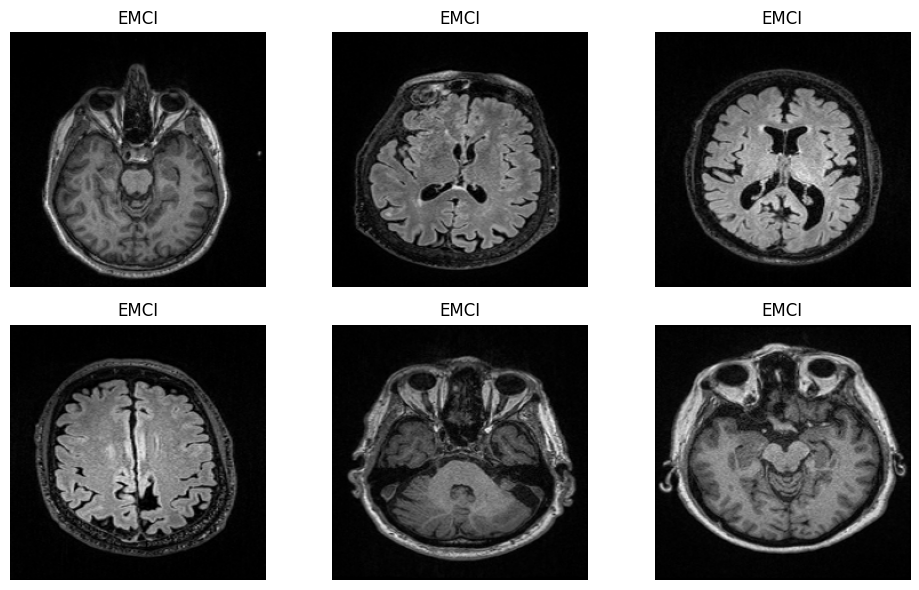

In [6]:
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

now we split into training and testing

In [1]:
# X = np.array(images)
# y = np.array(labels)
# n=len(images)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
# y_train_tensor=torch.tensor(y_train,dtype=torch.long)
# X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
# y_test_tensor=torch.tensor(y_test,dtype=torch.long)
# train_dataset=TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset=TensorDataset(X_test_tensor, y_test_tensor)
# batch_size=64
# train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# print(f"Train samples: {len(train_dataset)} ({len(train_dataset)/n*100:.2f}%)")
# print(f"Test samples: {len(train_dataset)} ({len(train_dataset)/n*100:.2f}%)")



NameError: name 'np' is not defined